## Customers Segmentation based on their Credit Card usage bhaviour

Dataset for this notebook consists of credit card usage behavior of customers with 18 behavioral features. Segmentation of customers can be used to define marketing strategies.


**Content of this Kernel:**
* Data Preprocessing
* Clustering using KMeans
* Interpretation of Clusters
* Visualization of Clusters using PCA

This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :-

* **CUSTID :** Identification of Credit Card holder (Categorical)
* **BALANCE :** Balance amount left in their account to make purchases (
* **BALANCE_FREQUENCY :** How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* **PURCHASES :** Amount of purchases made from account
* **ONEOFF_PURCHASES :** Maximum purchase amount done in one-go
* **INSTALLMENTS_PURCHASES :** Amount of purchase done in installment
* **CASH_ADVANCE :** Cash in advance given by the user
* **PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* **ONEOFF_PURCHASES_FREQUENCY :** How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* **PURCHASES_INSTALLMENTS_FREQUENCY :** How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* **CASH_ADVANCE_FREQUENCY :** How frequently the cash in advance being paid
* **CASH_ADVANCETRX :** Number of Transactions made with "Cash in Advanced"
* **PURCHASES_TRX :** Numbe of purchase transactions made
* **CREDIT_LIMIT :** Limit of Credit Card for user
* **PAYMENTS :** Amount of Payment done by user
* **MINIMUM_PAYMENTS :** Minimum amount of payments made by user
* **PRCFULL_PAYMENT :** Percent of full payment paid by user
* **TENURE :** Tenure of credit card service for user

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
data= pd.read_csv("data/customer-segmentation.csv")
print(data.shape)
data.head()

(8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Data Preprocessing

#### Descriptive Statistics of Data

In [3]:
data_orig = data

In [4]:
data_orig.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [12]:
data.skew()

BALANCE                             1.166703
BALANCE_FREQUENCY                  -1.172978
PURCHASES                           1.206380
ONEOFF_PURCHASES                    1.237216
INSTALLMENTS_PURCHASES              1.217388
CASH_ADVANCE                        1.241773
PURCHASES_FREQUENCY                 0.060164
ONEOFF_PURCHASES_FREQUENCY          1.250964
PURCHASES_INSTALLMENTS_FREQUENCY    0.509201
CASH_ADVANCE_FREQUENCY              1.273882
CASH_ADVANCE_TRX                    1.282306
PURCHASES_TRX                       1.139781
CREDIT_LIMIT                        1.102224
PAYMENTS                            1.130056
MINIMUM_PAYMENTS                    1.201944
PRC_FULL_PAYMENT                    1.211291
TENURE                              0.000000
dtype: float64

In [33]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.0
mean,1390.508973,0.931587,737.149330,354.358139,295.546214,672.468924,0.490351,0.184773,0.364437,0.126061,2.383128,11.623799,4419.304199,1347.084165,593.711582,0.087223,12.0
std,1537.538479,0.110984,879.534788,511.823289,396.181546,998.514970,0.401371,0.255668,0.397448,0.172676,3.417878,13.041645,3383.755481,1272.806272,572.040335,0.138616,0.0
min,0.000000,0.722222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,12.0
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.0
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.0
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.0
max,4942.927215,1.000000,2715.872500,1443.512500,1171.593750,2784.552848,1.000000,0.750000,1.000000,0.555555,10.000000,41.000000,13850.000000,4177.921543,1904.229874,0.357142,12.0


Seems like data have many outliers!

#### Dealing with Missing Values

In [6]:
data.isnull().sum().sort_values(ascending=False).head()

MINIMUM_PAYMENTS       313
CREDIT_LIMIT             1
TENURE                   0
PURCHASES_FREQUENCY      0
BALANCE                  0
dtype: int64

Imputing these missing values with mean

In [7]:
data.loc[(data['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=data['MINIMUM_PAYMENTS'].mean()
data.loc[(data['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=data['CREDIT_LIMIT'].mean()

In [8]:
data.isnull().sum().sort_values(ascending=False).head()

TENURE               0
PRC_FULL_PAYMENT     0
BALANCE              0
BALANCE_FREQUENCY    0
PURCHASES            0
dtype: int64

#### Dealing with Outliers
By dropping outliers we can lose many rows as there are too many outliers in dataset. Let's visualize them first!

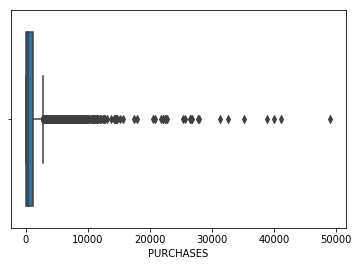

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.boxplot(data['PURCHASES'])

In [30]:
from numpy import percentile

In [10]:
def treat_outliers(col) :
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3-Q1
    lower_band = 0 if Q1 - 1.5*IQR <= 0 else Q1 - 1.5*IQR
    upper_band = Q3 + 1.5*IQR
    data[col] = data[col].clip(lower = lower_band, upper = upper_band)

In [11]:
for col in data.columns[1:]:
    treat_outliers(col)

In [13]:
data.drop(['CUST_ID'], axis=1, inplace=True)

In [14]:
X= np.asarray(data)

Normalizing input values.

In [15]:
scale = StandardScaler()
X = scale.fit_transform(X)
X.shape

(8950, 17)

In [16]:
X

array([[-0.87782104, -1.02187519, -0.72968709, ..., -0.79404745,
        -0.62927738,  0.        ],
       [ 1.1785459 , -0.2027079 , -0.83815959, ...,  0.83675109,
         0.9739614 ,  0.        ],
       [ 0.71848713,  0.61645939,  0.04095652, ...,  0.05869355,
        -0.62927738,  0.        ],
       ...,
       [-0.88920486, -0.88535181, -0.67397271, ..., -0.89385616,
         1.17436805,  0.        ],
       [-0.89567082, -0.88535181, -0.83815959, ..., -0.94046866,
         1.17436805,  0.        ],
       [-0.66200474, -1.88655177,  0.40489651, ..., -0.88359305,
        -0.62927738,  0.        ]])

## MODELING

#### Clustering using Kmeans

In [17]:
n_clusters=30
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(X)
    cost.append(kmean.inertia_)

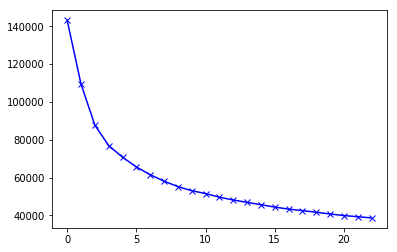

In [53]:
plt.plot(cost, 'bx-')

#### Choosing 6 clusters 

In [69]:
kmean= KMeans(6)
kmean.fit(X)
labels=kmean.labels_

In [70]:
clusters=pd.concat([data, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.0000,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,0
1,3202.467416,0.909091,0.00,0.0000,0.0,2784.552848,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,1
2,2495.148862,1.000000,773.17,773.1700,0.0,0.000000,1.000000,0.750000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,2
3,1666.670542,0.722222,1499.00,1443.5125,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,864.206542,0.000000,12.0,0
4,817.714335,1.000000,16.00,16.0000,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,4


## Interpretation of Clusters

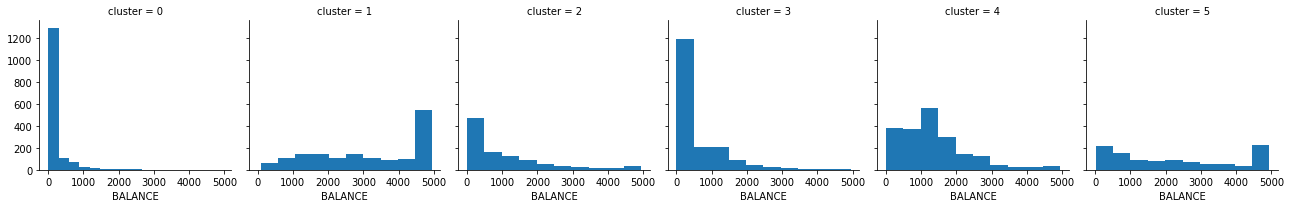

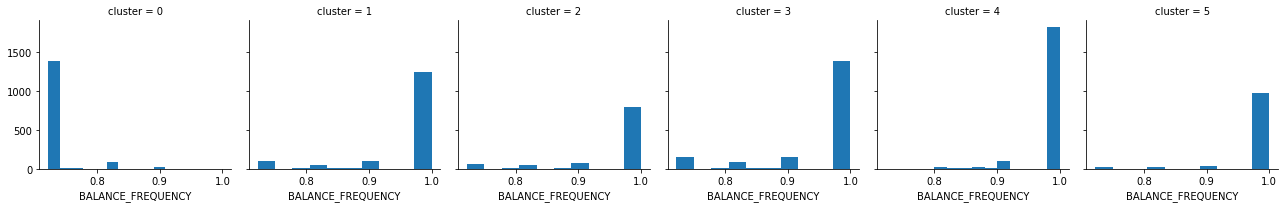

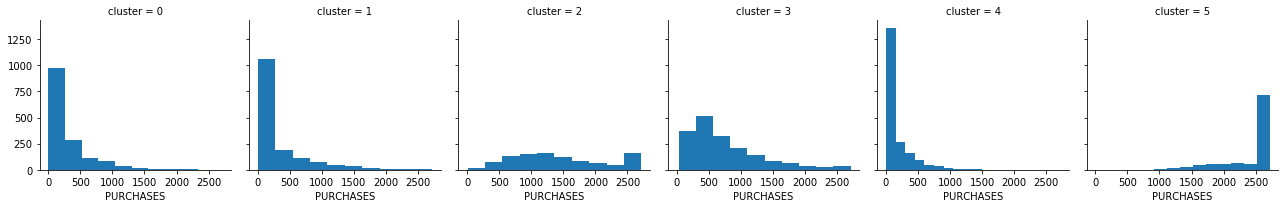

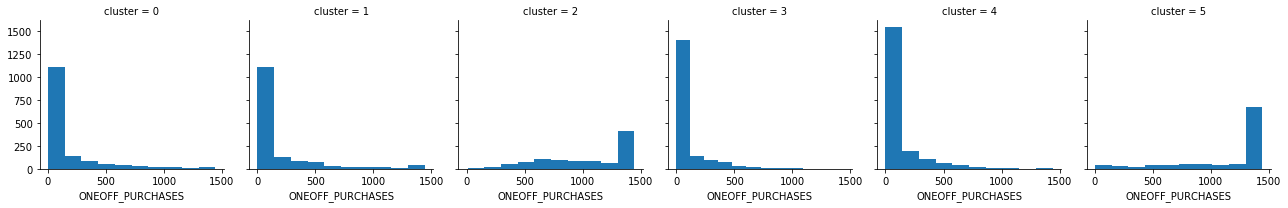

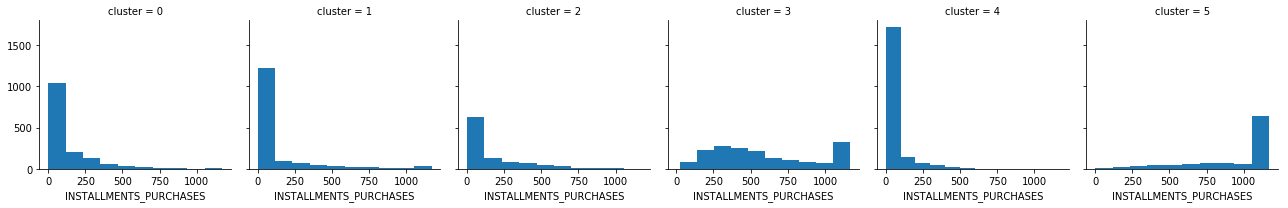

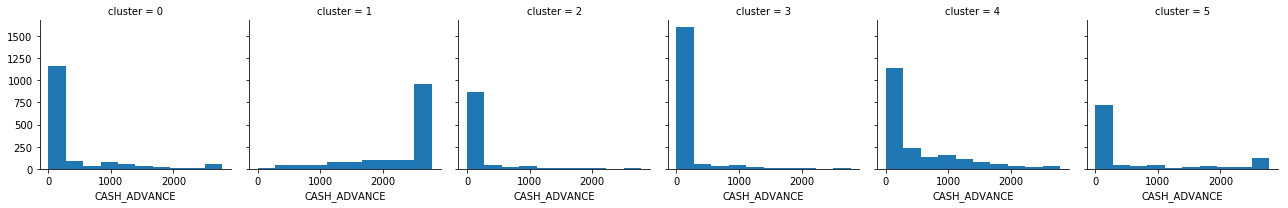

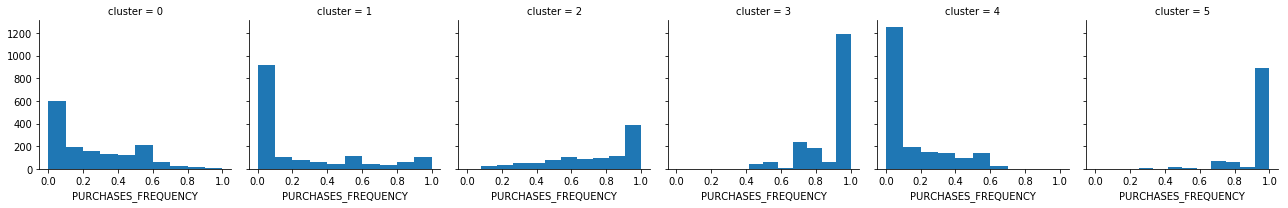

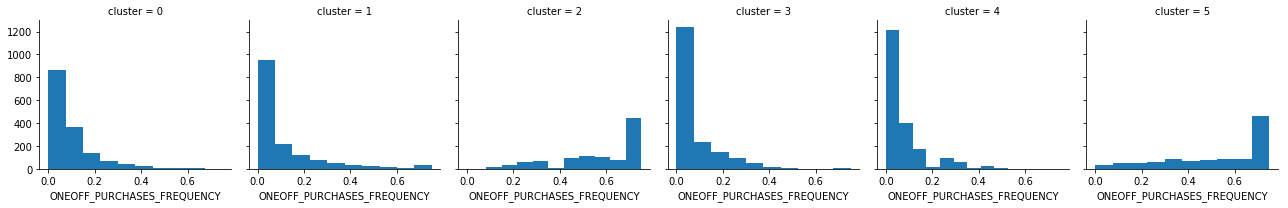

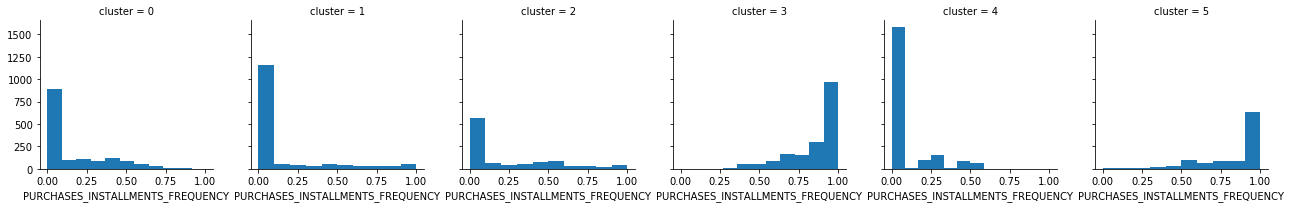

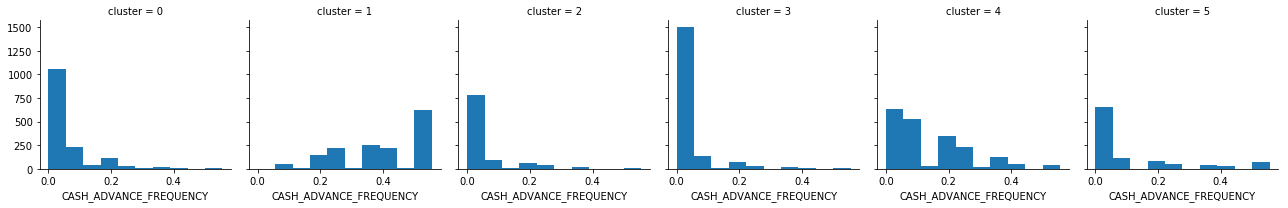

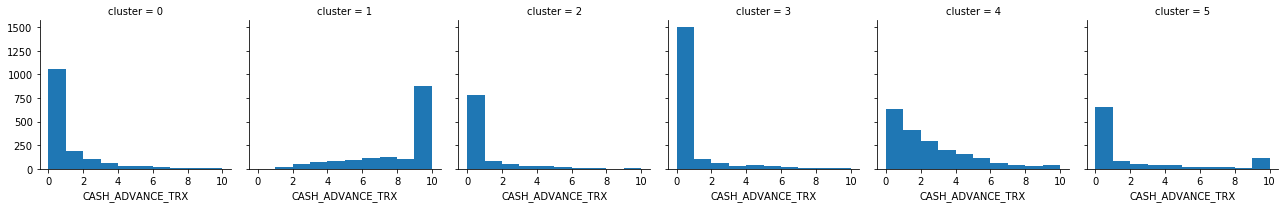

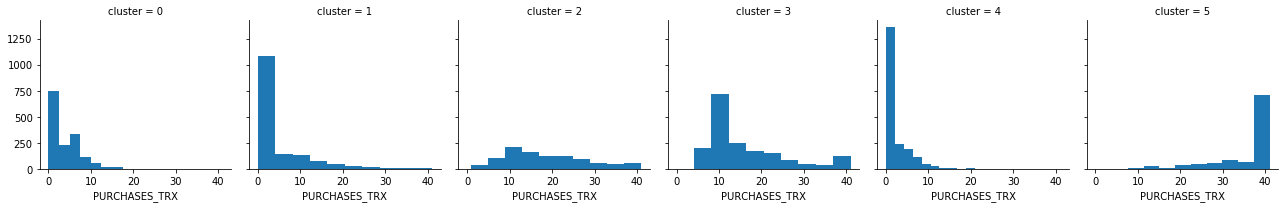

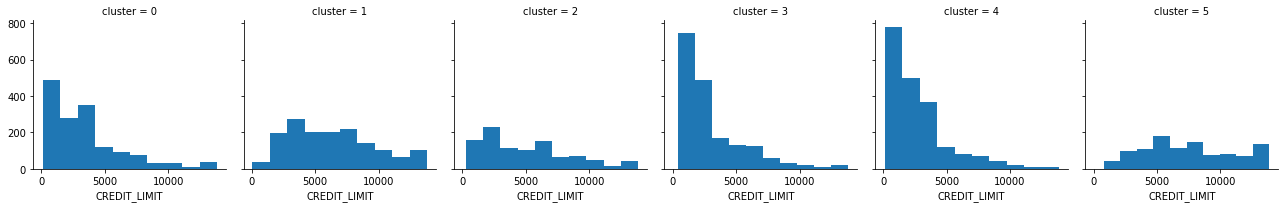

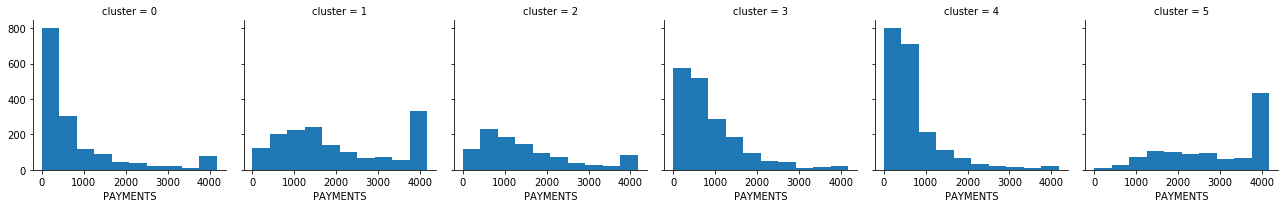

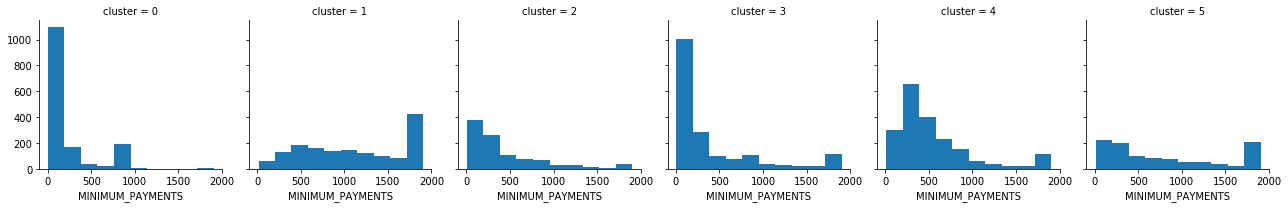

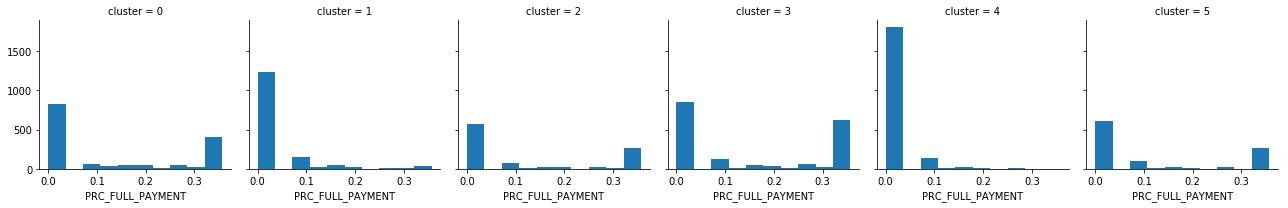

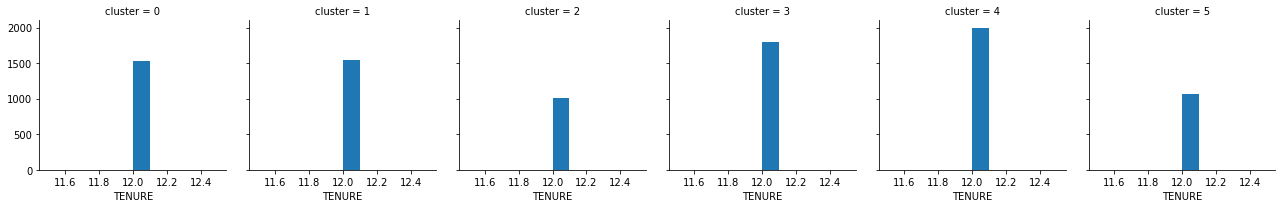

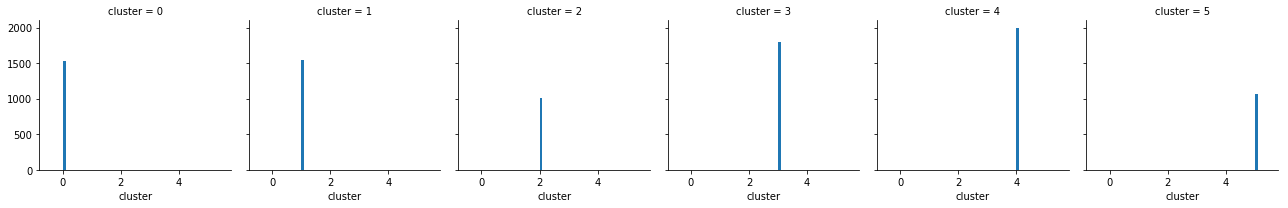

In [71]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

* **Cluster0** People with average to high credit limit who make all type of purchases

* **Cluster1** This group has more people with due payments who take advance cash more often

* **Cluster2** Less money spenders with average to high credit limits who purchases mostly in installments 

* **Cluster3** People with high credit limit who take more cash in advance 

* **Cluster4** High spenders with high credit limit who make expensive purchases

* **Cluster5** People who don't spend much money and who have average to high credit limit